# PCA클래스

In [1]:
import numpy as np
# 파일 경로 설정
file_path = 'C:/Users/user/Desktop/머신러닝+딥러닝/fruits_300.npy'

# npy 파일 읽기
fruits = np.load(file_path)

fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def draw_fruits(arr, ratio=1):
    n = len(arr)  # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n / 10))
    # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개 입니다
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:  # n개 까지만 그립니다
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

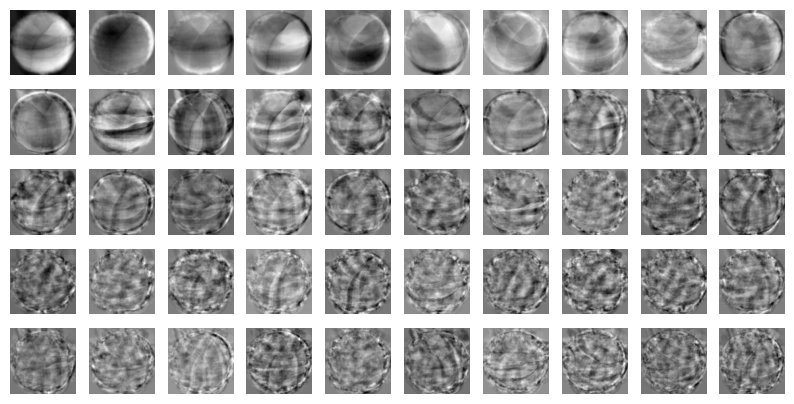

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- fruits_2d는 (300, 10000) 크기의 배열. 10000개의 픽셀(특성)을 가진 300개의 이미지. 50개의 주성분을 찾은 PCA모델을 사용해 이를(300, 50) 크기의 배열로 변환. 이제 fruits_pca 배열은 50개의 특성을 가진 데이터.

# 재구성

In [11]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


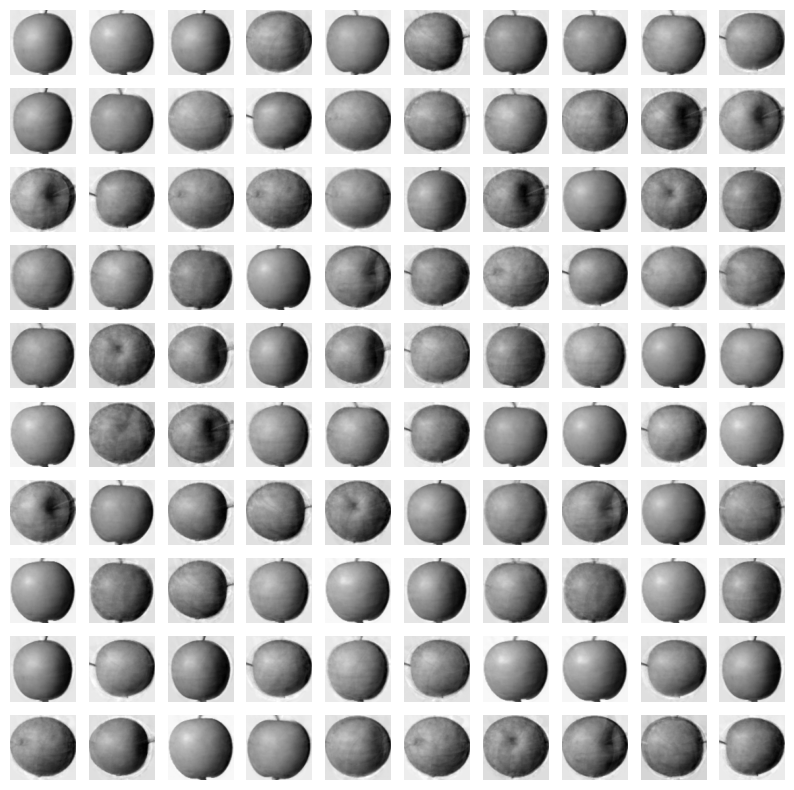

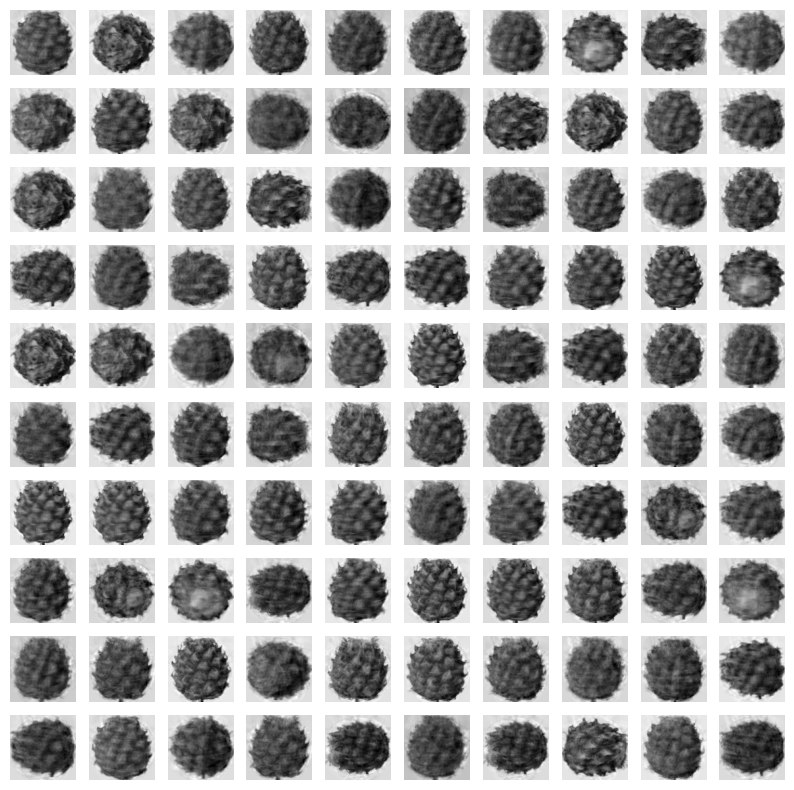

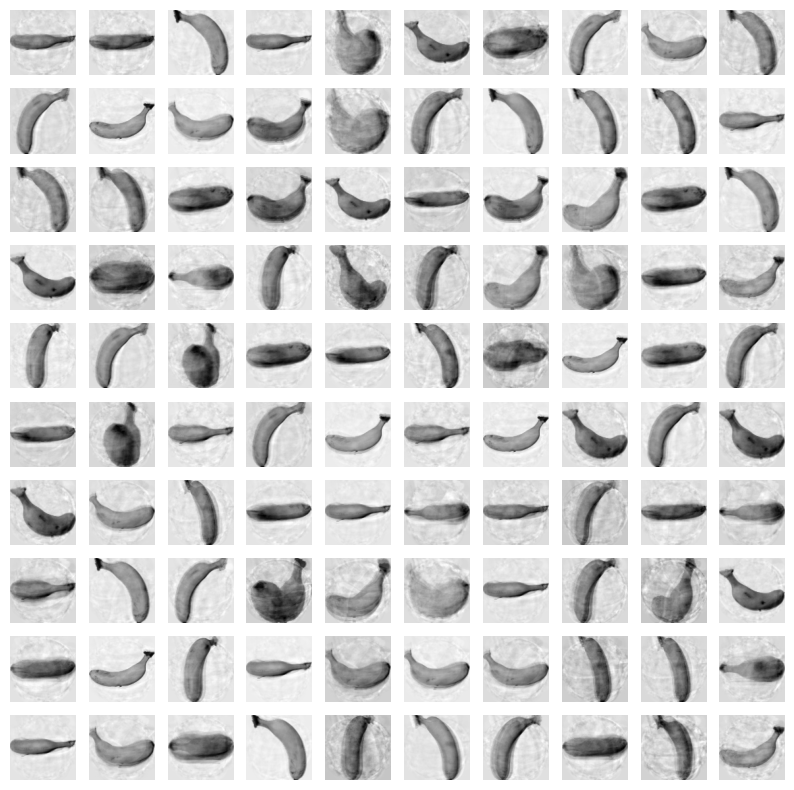

In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [13]:
print(np.sum(pca.explained_variance_ratio_))

0.921495944969666


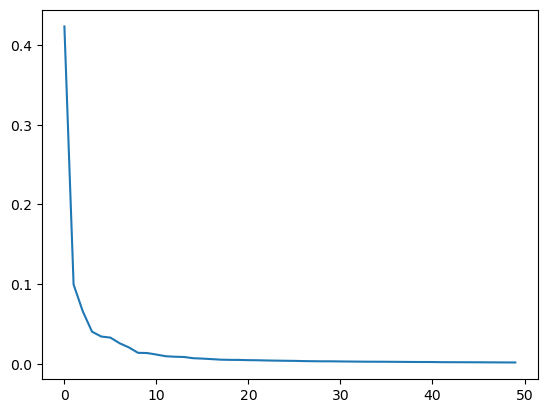

In [14]:
plt.plot(pca.explained_variance_ratio_)

# 분류기와 함께 사용하기

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [19]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.28773789405822753


In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.01574549674987793


In [21]:
pca = PCA(n_components=0.5) # 주성분 개수 대신0~1사이의 비율을 실수로 입력하면 된다.
pca.fit(fruits_2d)
print(pca.n_components_) # 몇 개의 주성분을 찾았는지 확인.

2


In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.020743608474731445


c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

# 군집과 함께 사용하기

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


# 시각화

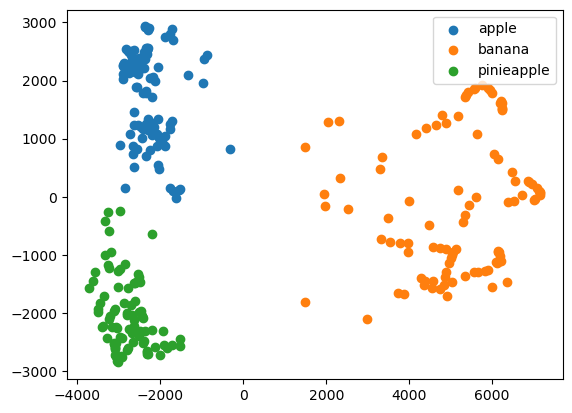

In [25]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pinieapple'])
plt.show()